In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ids-intrusion-csv/02-28-2018.csv
/kaggle/input/ids-intrusion-csv/03-01-2018.csv
/kaggle/input/ids-intrusion-csv/02-16-2018.csv
/kaggle/input/ids-intrusion-csv/02-15-2018.csv
/kaggle/input/ids-intrusion-csv/02-21-2018.csv
/kaggle/input/ids-intrusion-csv/03-02-2018.csv
/kaggle/input/ids-intrusion-csv/02-22-2018.csv
/kaggle/input/ids-intrusion-csv/02-20-2018.csv
/kaggle/input/ids-intrusion-csv/02-14-2018.csv
/kaggle/input/ids-intrusion-csv/02-23-2018.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%%time
df_d1 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-14-2018.csv", low_memory=False)
df_d2 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-15-2018.csv", low_memory=False)
df_d3 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-16-2018.csv", low_memory=False)
df_d4 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-20-2018.csv", low_memory=False)
df_d5 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-21-2018.csv", low_memory=False)
df_d6 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-22-2018.csv", low_memory=False)
df_d7 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-23-2018.csv", low_memory=False)
df_d8 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-28-2018.csv", low_memory=False)
df_d9 = pd.read_csv("/kaggle/input/ids-intrusion-csv/03-01-2018.csv", low_memory=False)
df_d10 = pd.read_csv("/kaggle/input/ids-intrusion-csv/03-02-2018.csv", low_memory=False)

CPU times: user 4min 27s, sys: 31.1 s, total: 4min 58s
Wall time: 6min 9s


In [4]:
df_d4.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1,inplace=True)

In [5]:
def fix_data_type(df):
    
    df = df[df['Dst Port'] != 'Dst Port']
    
    df['Dst Port'] = df['Dst Port'].astype(int)
    df['Protocol'] = df['Protocol'].astype(int)
    df['Flow Duration'] = df['Flow Duration'].astype(int)
    df['Tot Fwd Pkts'] = df['Tot Fwd Pkts'].astype(int)
    df['Tot Bwd Pkts'] = df['Tot Bwd Pkts'].astype(int)
    df['TotLen Fwd Pkts'] = df['TotLen Fwd Pkts'].astype(int)
    df['TotLen Bwd Pkts'] = df['TotLen Bwd Pkts'].astype(int)
    df['Fwd Pkt Len Max'] = df['Fwd Pkt Len Max'].astype(int)
    df['Fwd Pkt Len Min'] = df['Fwd Pkt Len Min'].astype(int)
    df['Fwd Pkt Len Mean'] = df['Fwd Pkt Len Mean'].astype(float)
    df['Fwd Pkt Len Std'] = df['Fwd Pkt Len Std'].astype(float)
    df['Bwd Pkt Len Max'] = df['Bwd Pkt Len Max'].astype(int)
    df['Bwd Pkt Len Min'] = df['Bwd Pkt Len Min'].astype(int)
    df['Bwd Pkt Len Mean'] = df['Bwd Pkt Len Mean'].astype(float)
    df['Bwd Pkt Len Std'] = df['Bwd Pkt Len Std'].astype(float)
    df['Flow Byts/s'] = df['Flow Byts/s'].astype(float)
    df['Flow Pkts/s'] = df['Flow Pkts/s'].astype(float)
    df['Flow IAT Mean'] = df['Flow IAT Mean'].astype(float)
    df['Flow IAT Std'] = df['Flow IAT Std'].astype(float)
    df['Flow IAT Max'] = df['Flow IAT Max'].astype(int)
    df['Flow IAT Min'] = df['Flow IAT Min'].astype(int)
    df['Fwd IAT Tot'] = df['Fwd IAT Tot'].astype(int)
    df['Fwd IAT Mean'] = df['Fwd IAT Mean'].astype(float)
    df['Fwd IAT Std'] = df['Fwd IAT Std'].astype(float)
    df['Fwd IAT Max'] = df['Fwd IAT Max'].astype(int)
    df['Fwd IAT Min'] = df['Fwd IAT Min'].astype(int)
    df['Bwd IAT Tot'] = df['Bwd IAT Tot'].astype(int)
    df['Bwd IAT Mean'] = df['Bwd IAT Mean'].astype(float)
    df['Bwd IAT Std'] = df['Bwd IAT Std'].astype(float)
    df['Bwd IAT Max'] = df['Bwd IAT Max'].astype(int)
    df['Bwd IAT Min'] = df['Bwd IAT Min'].astype(int)
    df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype(int)
    df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype(int)
    df['Fwd URG Flags'] = df['Fwd URG Flags'].astype(int)
    df['Bwd URG Flags'] = df['Bwd URG Flags'].astype(int)
    df['Fwd Header Len'] = df['Fwd Header Len'].astype(int)
    df['Bwd Header Len'] = df['Bwd Header Len'].astype(int)
    df['Fwd Pkts/s'] = df['Fwd Pkts/s'].astype(float)
    df['Bwd Pkts/s'] = df['Bwd Pkts/s'].astype(float)
    df['Pkt Len Min'] = df['Pkt Len Min'].astype(int)
    df['Pkt Len Max'] = df['Pkt Len Max'].astype(int)
    df['Pkt Len Mean'] = df['Pkt Len Mean'].astype(float)
    df['Pkt Len Std'] = df['Pkt Len Std'].astype(float)
    df['Pkt Len Var'] = df['Pkt Len Var'].astype(float)
    df['FIN Flag Cnt'] = df['FIN Flag Cnt'].astype(int)
    df['SYN Flag Cnt'] = df['SYN Flag Cnt'].astype(int)
    df['RST Flag Cnt'] = df['RST Flag Cnt'].astype(int)
    df['PSH Flag Cnt'] = df['PSH Flag Cnt'].astype(int)
    df['ACK Flag Cnt'] = df['ACK Flag Cnt'].astype(int)
    df['URG Flag Cnt'] = df['URG Flag Cnt'].astype(int)
    df['CWE Flag Count'] = df['CWE Flag Count'].astype(int)
    df['ECE Flag Cnt'] = df['ECE Flag Cnt'].astype(int)
    df['Down/Up Ratio'] = df['Down/Up Ratio'].astype(int)
    df['Pkt Size Avg'] = df['Pkt Size Avg'].astype(float)
    df['Fwd Seg Size Avg'] = df['Fwd Seg Size Avg'].astype(float)
    df['Bwd Seg Size Avg'] = df['Bwd Seg Size Avg'].astype(float)
    df['Fwd Byts/b Avg'] = df['Fwd Byts/b Avg'].astype(int)
    df['Fwd Pkts/b Avg'] = df['Fwd Pkts/b Avg'].astype(int)
    df['Fwd Blk Rate Avg'] = df['Fwd Blk Rate Avg'].astype(int)
    df['Bwd Byts/b Avg'] = df['Bwd Byts/b Avg'].astype(int)
    df['Bwd Pkts/b Avg'] = df['Bwd Pkts/b Avg'].astype(int)
    df['Bwd Blk Rate Avg'] = df['Bwd Blk Rate Avg'].astype(int)
    df['Subflow Fwd Pkts'] = df['Subflow Fwd Pkts'].astype(int)
    df['Subflow Fwd Byts'] = df['Subflow Fwd Byts'].astype(int)
    df['Subflow Bwd Pkts'] = df['Subflow Bwd Pkts'].astype(int)
    df['Subflow Bwd Byts'] = df['Subflow Bwd Byts'].astype(int)
    df['Init Fwd Win Byts'] = df['Init Fwd Win Byts'].astype(int)
    df['Init Bwd Win Byts'] = df['Init Bwd Win Byts'].astype(int)
    df['Fwd Act Data Pkts'] = df['Fwd Act Data Pkts'].astype(int)
    df['Fwd Seg Size Min'] = df['Fwd Seg Size Min'].astype(int)
    df['Active Mean'] = df['Active Mean'].astype(float)
    df['Active Std'] = df['Active Std'].astype(float)
    df['Active Max'] = df['Active Max'].astype(int)
    df['Active Min'] = df['Active Min'].astype(int)
    df['Idle Mean'] = df['Idle Mean'].astype(float)
    df['Idle Std'] = df['Idle Std'].astype(float)
    df['Idle Max'] = df['Idle Max'].astype(int)
    df['Idle Min'] = df['Idle Min'].astype(int)
    
    return df

In [6]:
%%time
df_d1 = fix_data_type(df_d1)
df_d2 = fix_data_type(df_d2)
df_d3 = fix_data_type(df_d3)
df_d4 = fix_data_type(df_d4)
df_d5 = fix_data_type(df_d5)
df_d6 = fix_data_type(df_d6)
df_d7 = fix_data_type(df_d7)
df_d8 = fix_data_type(df_d8)
df_d9 = fix_data_type(df_d9)
df_d10 = fix_data_type(df_d10)

CPU times: user 28.1 s, sys: 5.64 s, total: 33.8 s
Wall time: 33.8 s


In [7]:
def drop_infinate_null(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)
    
    return df

In [8]:
%%time
df_d1 = drop_infinate_null(df_d1)
df_d2 = drop_infinate_null(df_d2)
df_d3 = drop_infinate_null(df_d3)
df_d4 = drop_infinate_null(df_d4)
df_d5 = drop_infinate_null(df_d5)
df_d6 = drop_infinate_null(df_d6)
df_d7 = drop_infinate_null(df_d7)
df_d8 = drop_infinate_null(df_d8)
df_d9 = drop_infinate_null(df_d9)
df_d10 = drop_infinate_null(df_d10)

(1048575, 80)
(1044751, 80)
(1048575, 80)
(1040548, 80)
(1048574, 80)
(1048574, 80)
(7948748, 80)
(7889295, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1042965, 80)
(1048575, 80)
(1042867, 80)
(613071, 80)
(606902, 80)
(331100, 80)
(328181, 80)
(1048575, 80)
(1044525, 80)
CPU times: user 32.5 s, sys: 10.3 s, total: 42.9 s
Wall time: 43 s


In [9]:
def drop_unnecessary_column(df): 
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [10]:
%%time
df_d1 = drop_unnecessary_column(df_d1)
df_d2 = drop_unnecessary_column(df_d2)
df_d3 = drop_unnecessary_column(df_d3)
df_d4 = drop_unnecessary_column(df_d4)
df_d5 = drop_unnecessary_column(df_d5)
df_d6 = drop_unnecessary_column(df_d6)
df_d7 = drop_unnecessary_column(df_d7)
df_d8 = drop_unnecessary_column(df_d8)
df_d9 = drop_unnecessary_column(df_d9)
df_d10 = drop_unnecessary_column(df_d10)

(1044751, 79)
(1040548, 79)
(1048574, 79)
(7889295, 79)
(1048575, 79)
(1042965, 79)
(1042867, 79)
(606902, 79)
(328181, 79)
(1044525, 79)
CPU times: user 1.97 s, sys: 1.39 s, total: 3.36 s
Wall time: 3.35 s


In [11]:
def generate_binary_label(df):
    # encode the target feature
    df['Threat'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Threat'].unique())
    print(df['Threat'].value_counts())
    return df

In [12]:
%%time
df_d1 = generate_binary_label(df_d1)
df_d2 = generate_binary_label(df_d2)
df_d3 = generate_binary_label(df_d3)
df_d4 = generate_binary_label(df_d4)
df_d5 = generate_binary_label(df_d5)
df_d6 = generate_binary_label(df_d6)
df_d7 = generate_binary_label(df_d7)
df_d8 = generate_binary_label(df_d8)
df_d9 = generate_binary_label(df_d9)
df_d10 = generate_binary_label(df_d10)

['Benign' 'Malicious']
Threat
Benign       663808
Malicious    380943
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       988050
Malicious     52498
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Malicious    601802
Benign       446772
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       7313104
Malicious     576191
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Malicious    687742
Benign       360833
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       1042603
Malicious        362
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       1042301
Malicious        566
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       538666
Malicious     68236
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       235778
Malicious     92403
Name: count, dtype: int64
['Benign' 'Malicious']
Threat
Benign       758334
Malicious    286191
Name: count, dtype: int64
CPU times: user 6.93 s, sys: 8.05 

In [13]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] 
    for col in props.columns:
        if props[col].dtype != object:  

            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            else:
                props[col] = props[col].astype(np.float32)
    
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [14]:
%%time
df_d1, _ = reduce_mem_usage(df_d1)
df_d2, _ = reduce_mem_usage(df_d2)
df_d3, _ = reduce_mem_usage(df_d3)
df_d4, _ = reduce_mem_usage(df_d4)
df_d5, _ = reduce_mem_usage(df_d5)
df_d6, _ = reduce_mem_usage(df_d6)
df_d7, _ = reduce_mem_usage(df_d7)
df_d8, _ = reduce_mem_usage(df_d8)
df_d9, _ = reduce_mem_usage(df_d9)
df_d10, _ = reduce_mem_usage(df_d10)

Memory usage of properties dataframe is : 645.6362228393555  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  279.97496700286865  MB
This is  43.364197530864196 % of the initial size
Memory usage of properties dataframe is : 643.0388488769531  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  247.09363174438477  MB
This is  38.425925925925924 % of the initial size
Memory usage of properties dataframe is : 647.9987640380859  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  235.99954986572266  MB
This is  36.41975308641975 % of the initial size
Memory usage of properties dataframe is : 4875.4340744018555  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1941.1450481414795  MB
This is  39.81481481481482 % of the initial size
Memory usage of properties dataframe is : 639.99951171875  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  238.99989414215088  MB
This is  37.343761950740394 % of the initial size
Memory usage of properties dataframe is : 6

In [15]:
## https://www.researchgate.net/figure/Attack-Types-in-CSE-CIC-IDS2018-dataset_tbl1_333894962

mapping= {'SSH-Bruteforce': 'Brute-force',
          'FTP-BruteForce': 'Brute-force',
          ################ Brute-force 
          
          'Brute Force -XSS': 'Web attack',
          'Brute Force -Web': 'Web attack',
          'SQL Injection': 'Web attack',
          ################ Web attack 
          
          'DoS attacks-Hulk': 'DoS attack',
          'DoS attacks-SlowHTTPTest': 'DoS attack',
          'DoS attacks-Slowloris': 'DoS attack',
          'DoS attacks-GoldenEye': 'DoS attack',
          ################ DoS attack 
          
          'DDOS attack-HOIC': 'DDoS attack',
          'DDOS attack-LOIC-UDP': 'DDoS attack',
          'DDoS attacks-LOIC-HTTP': 'DDoS attack',
          ################ DDoS attack 
          
          'Bot': 'Botnet',
          ################ Botnet 
          
          'Infilteration': 'Infilteration',
          ################ Infilteration 
          
          'Benign': 'Benign',
          'Label': 'Benign',
          ################ Infilteration 
    }

def transform_multi_label(df):
    print(df['Label'].value_counts())
    df['Label'] = df['Label'].map(mapping) 
    return df

In [16]:
%%time
df_d1 = transform_multi_label(df_d1)
df_d2 = transform_multi_label(df_d2)
df_d3 = transform_multi_label(df_d3)
df_d4 = transform_multi_label(df_d4)
df_d5 = transform_multi_label(df_d5)
df_d6 = transform_multi_label(df_d6)
df_d7 = transform_multi_label(df_d7)
df_d8 = transform_multi_label(df_d8)
df_d9 = transform_multi_label(df_d9)
df_d10 = transform_multi_label(df_d10)

Label
Benign            663808
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: count, dtype: int64
Label
Benign                   988050
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64
Label
Benign                    7313104
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64
Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64
Label
Benign              1042603
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: count, dtype: int64
Label
Benign              1042301
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64
Label
Benign           538666
Infilteration     68236
Name: count, dtype: int64
Label
Benign           235778
Infil

In [17]:
from imblearn.under_sampling import RandomUnderSampler

def balance_data(df):
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y) 

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())
    
    return df


In [18]:
%%time
df_d1 = balance_data(df_d1)
df_d2 = balance_data(df_d2)
df_d3 = balance_data(df_d3)
df_d4 = balance_data(df_d4)
df_d5 = balance_data(df_d5)
df_d6 = balance_data(df_d6)
df_d7 = balance_data(df_d7)
df_d8 = balance_data(df_d8)
df_d9 = balance_data(df_d9)
df_d10 = balance_data(df_d10)


(761886, 80)
Label
Benign         380943
Brute-force    380943
Name: count, dtype: int64
(104996, 80)
Label
Benign        52498
DoS attack    52498
Name: count, dtype: int64
(893544, 80)
Label
Benign        446772
DoS attack    446772
Name: count, dtype: int64
(1152382, 80)
Label
Benign         576191
DDoS attack    576191
Name: count, dtype: int64
(721666, 80)
Label
Benign         360833
DDoS attack    360833
Name: count, dtype: int64
(724, 80)
Label
Benign        362
Web attack    362
Name: count, dtype: int64
(1132, 80)
Label
Benign        566
Web attack    566
Name: count, dtype: int64
(136472, 80)
Label
Benign           68236
Infilteration    68236
Name: count, dtype: int64
(184806, 80)
Label
Benign           92403
Infilteration    92403
Name: count, dtype: int64
(572382, 80)
Label
Benign    286191
Botnet    286191
Name: count, dtype: int64
CPU times: user 1min 49s, sys: 920 ms, total: 1min 50s
Wall time: 1min 49s


In [19]:
%%time
df_all = pd.concat([df_d1, df_d2], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d1, df_d2

df_all = pd.concat([df_all, df_d3], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d3

df_all = pd.concat([df_all, df_d4], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d4

df_all = pd.concat([df_all, df_d5], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d5

df_all = pd.concat([df_all, df_d6], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d6

df_all = pd.concat([df_all, df_d7], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d7

df_all = pd.concat([df_all, df_d8], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d8

df_all = pd.concat([df_all, df_d9], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d9

df_all = pd.concat([df_all, df_d10], axis=0)
df_all.reset_index(drop=True, inplace=True)
del df_d10

CPU times: user 1.97 s, sys: 29.8 ms, total: 2 s
Wall time: 2 s


In [20]:
# df_all = df_d4
# del df_d4

In [21]:
print(df_all['Label'].value_counts())

Label
Benign           2264995
DDoS attack       937024
DoS attack        499270
Brute-force       380943
Botnet            286191
Infilteration     160639
Web attack           928
Name: count, dtype: int64


In [22]:
# attack_df = df_all[df_all["Threat"] != "Benign"]
# normal_df = df_all[df_all["Threat"] == "Benign"].sample(n=len(attack_df))

In [23]:
# df_all = pd.concat([attack_df, normal_df], axis=0)
# del attack_df, normal_df

In [24]:
%%time
variances = df_all.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_all = df_all.drop(constant_columns, axis=1)

print(constant_columns)
print (df_all.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(4529990, 72)
CPU times: user 2.75 s, sys: 2.76 ms, total: 2.75 s
Wall time: 2.75 s


In [25]:
%%time
duplicates = set()
for i in range(0, len(df_all.columns)):
    col1 = df_all.columns[i]
    for j in range(i+1, len(df_all.columns)):
        col2 = df_all.columns[j]
        if(df_all[col1].equals(df_all[col2])):
            duplicates.add(col2)

CPU times: user 2.32 s, sys: 2.85 ms, total: 2.32 s
Wall time: 2.32 s


In [26]:
print (duplicates)
df_all.drop(duplicates, axis=1, inplace=True)
print (df_all.shape)

{'Fwd Seg Size Avg', 'CWE Flag Count', 'Subflow Bwd Pkts', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'SYN Flag Cnt'}
(4529990, 65)


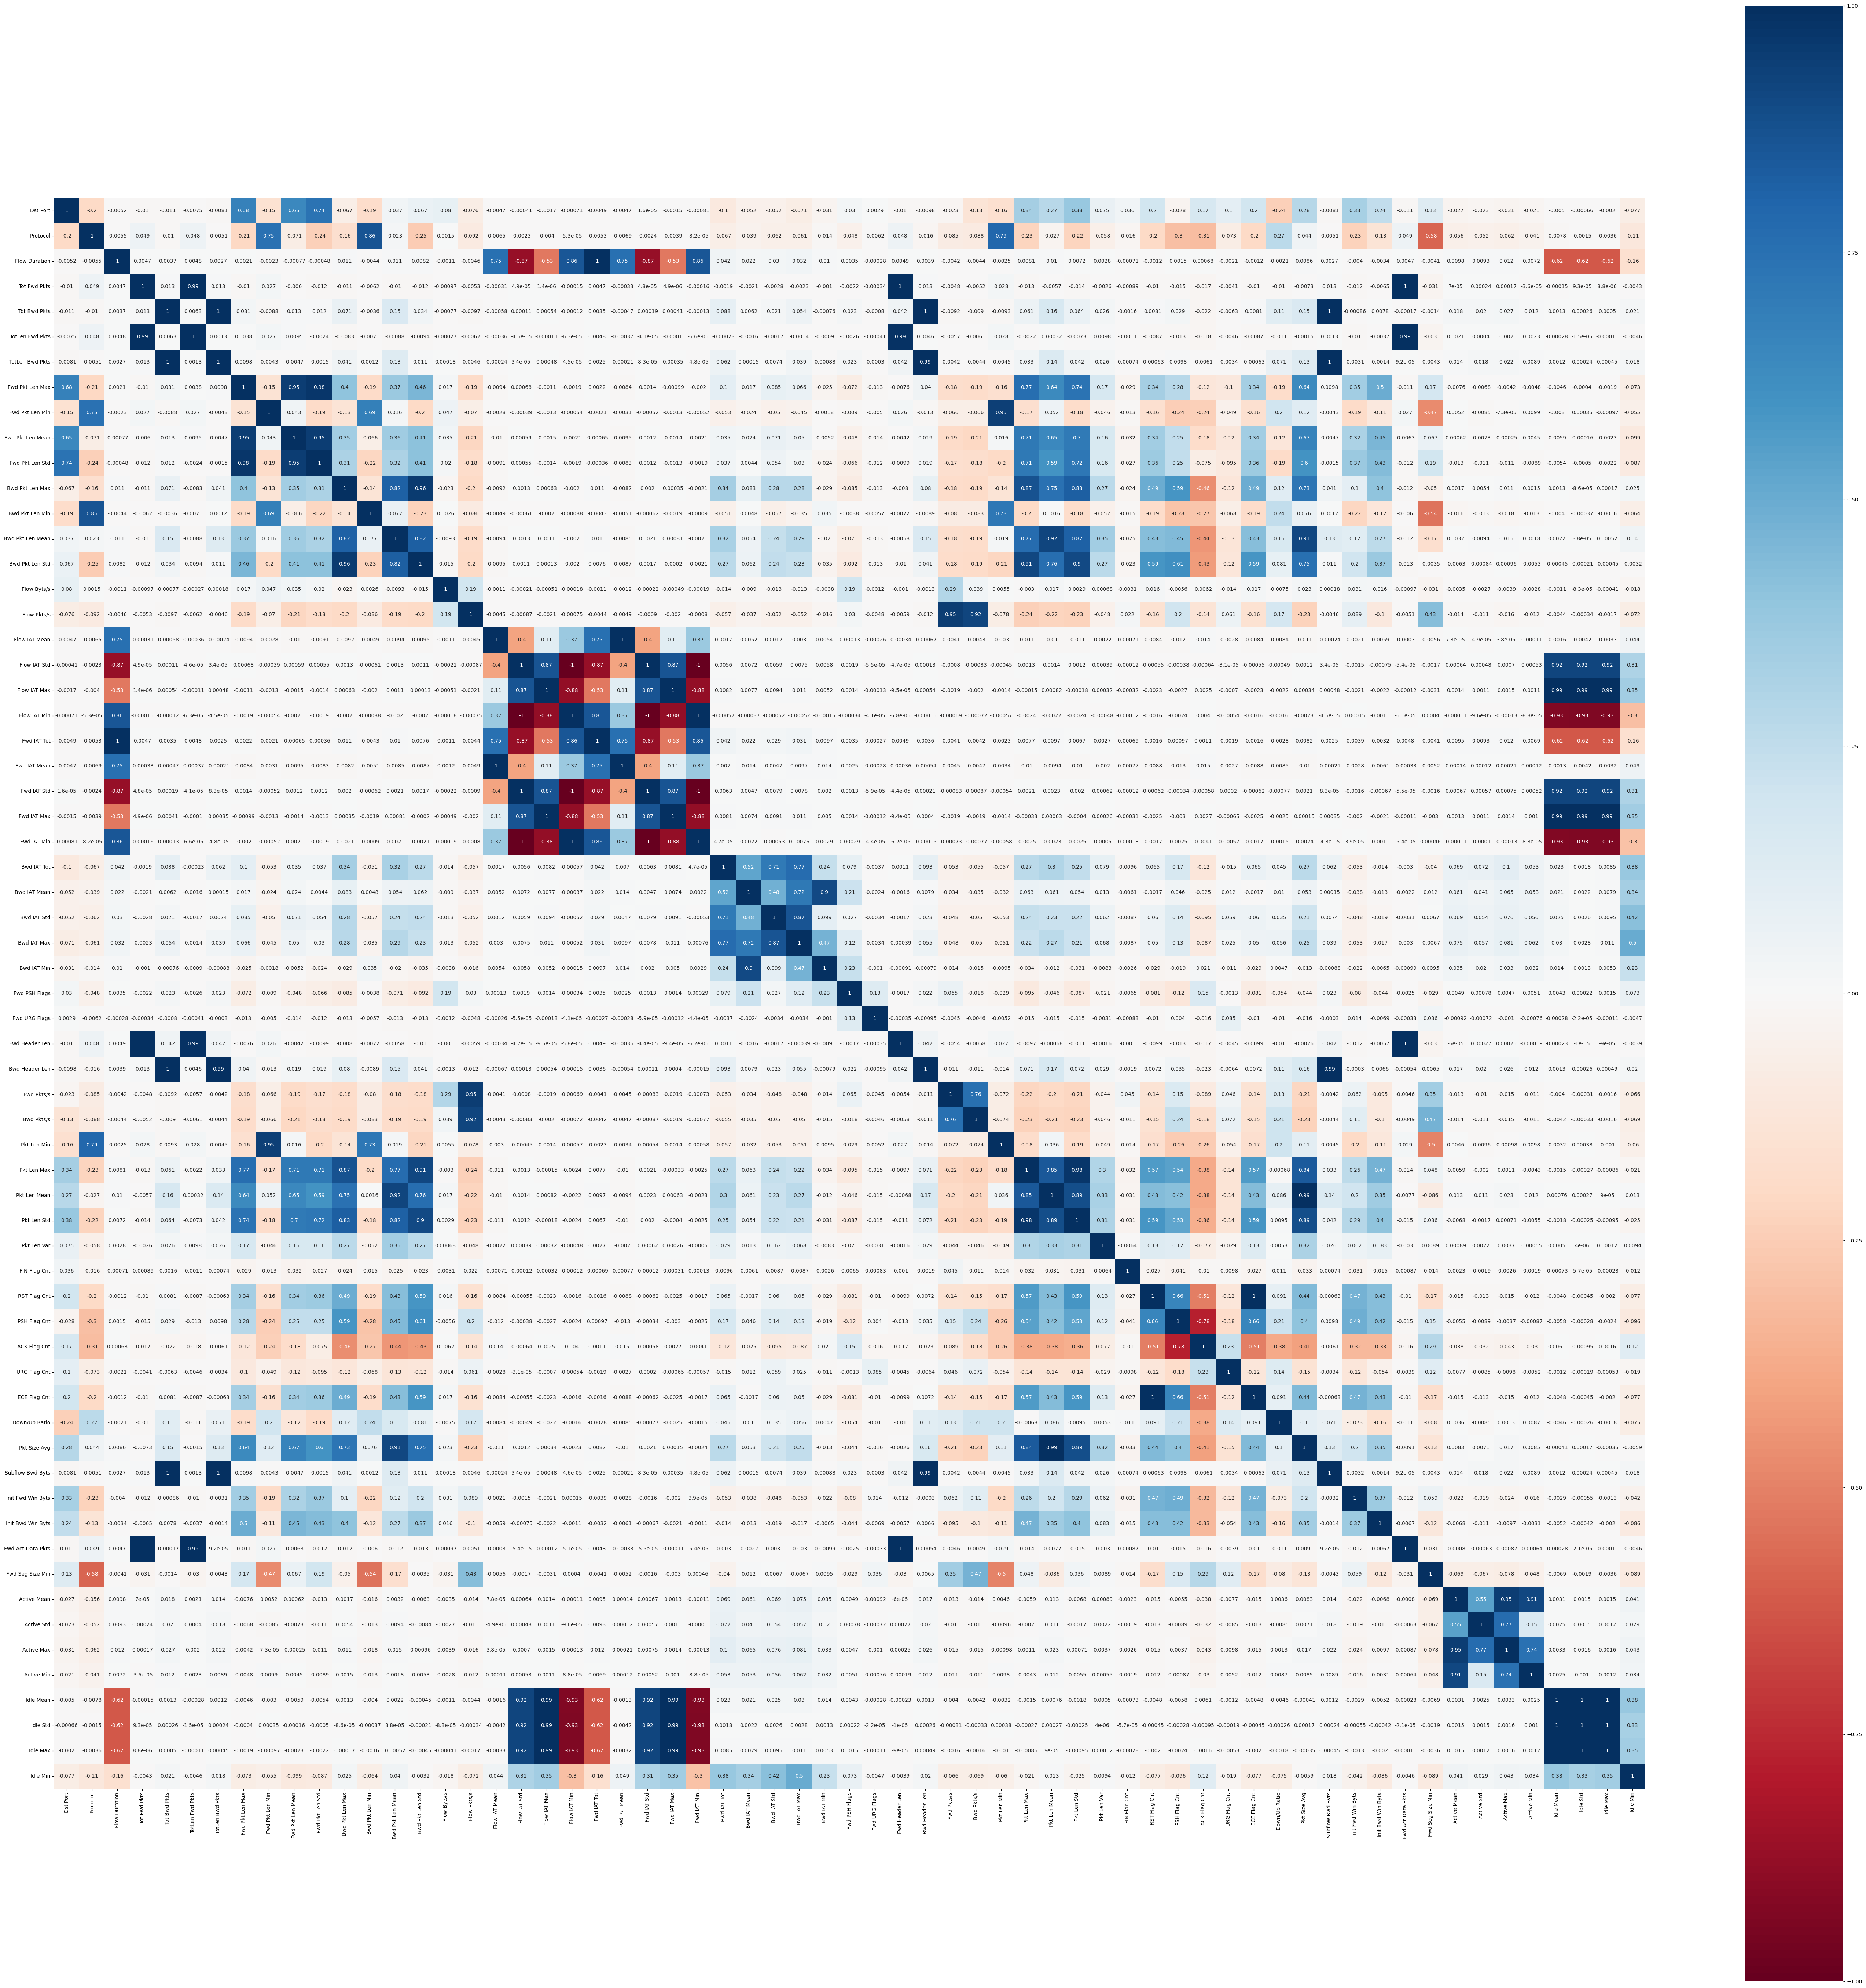

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [28]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
            if (np.abs(corr.iloc[i, j]) >= threshold) and (is_correlated[j]):
                colname = corr.columns[j]
                is_correlated[j]=False
                correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'RST Flag Cnt', 'TotLen Fwd Pkts', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Fwd IAT Std', 'Tot Fwd Pkts', 'Bwd Header Len', 'Tot Bwd Pkts', 'Flow Pkts/s', 'Bwd Pkt Len Std', 'Bwd Pkt Len Max', 'Flow Duration', 'Flow IAT Min', 'Bwd IAT Mean', 'Fwd Pkt Len Max', 'Fwd IAT Max', 'Pkt Len Max', 'Flow IAT Mean', 'Fwd IAT Min', 'Idle Std', 'Flow IAT Max', 'Active Mean', 'Flow IAT Std', 'Idle Mean', 'Fwd Header Len', 'Pkt Len Mean', 'Fwd Pkt Len Min', 'TotLen Bwd Pkts'}
28
CPU times: user 74.4 ms, sys: 0 ns, total: 74.4 ms
Wall time: 73.6 ms


In [29]:
%%time
df_all.drop(correlated_col, axis=1, inplace=True)
print (df_all.shape)

(4529990, 37)
CPU times: user 554 ms, sys: 20 µs, total: 554 ms
Wall time: 553 ms


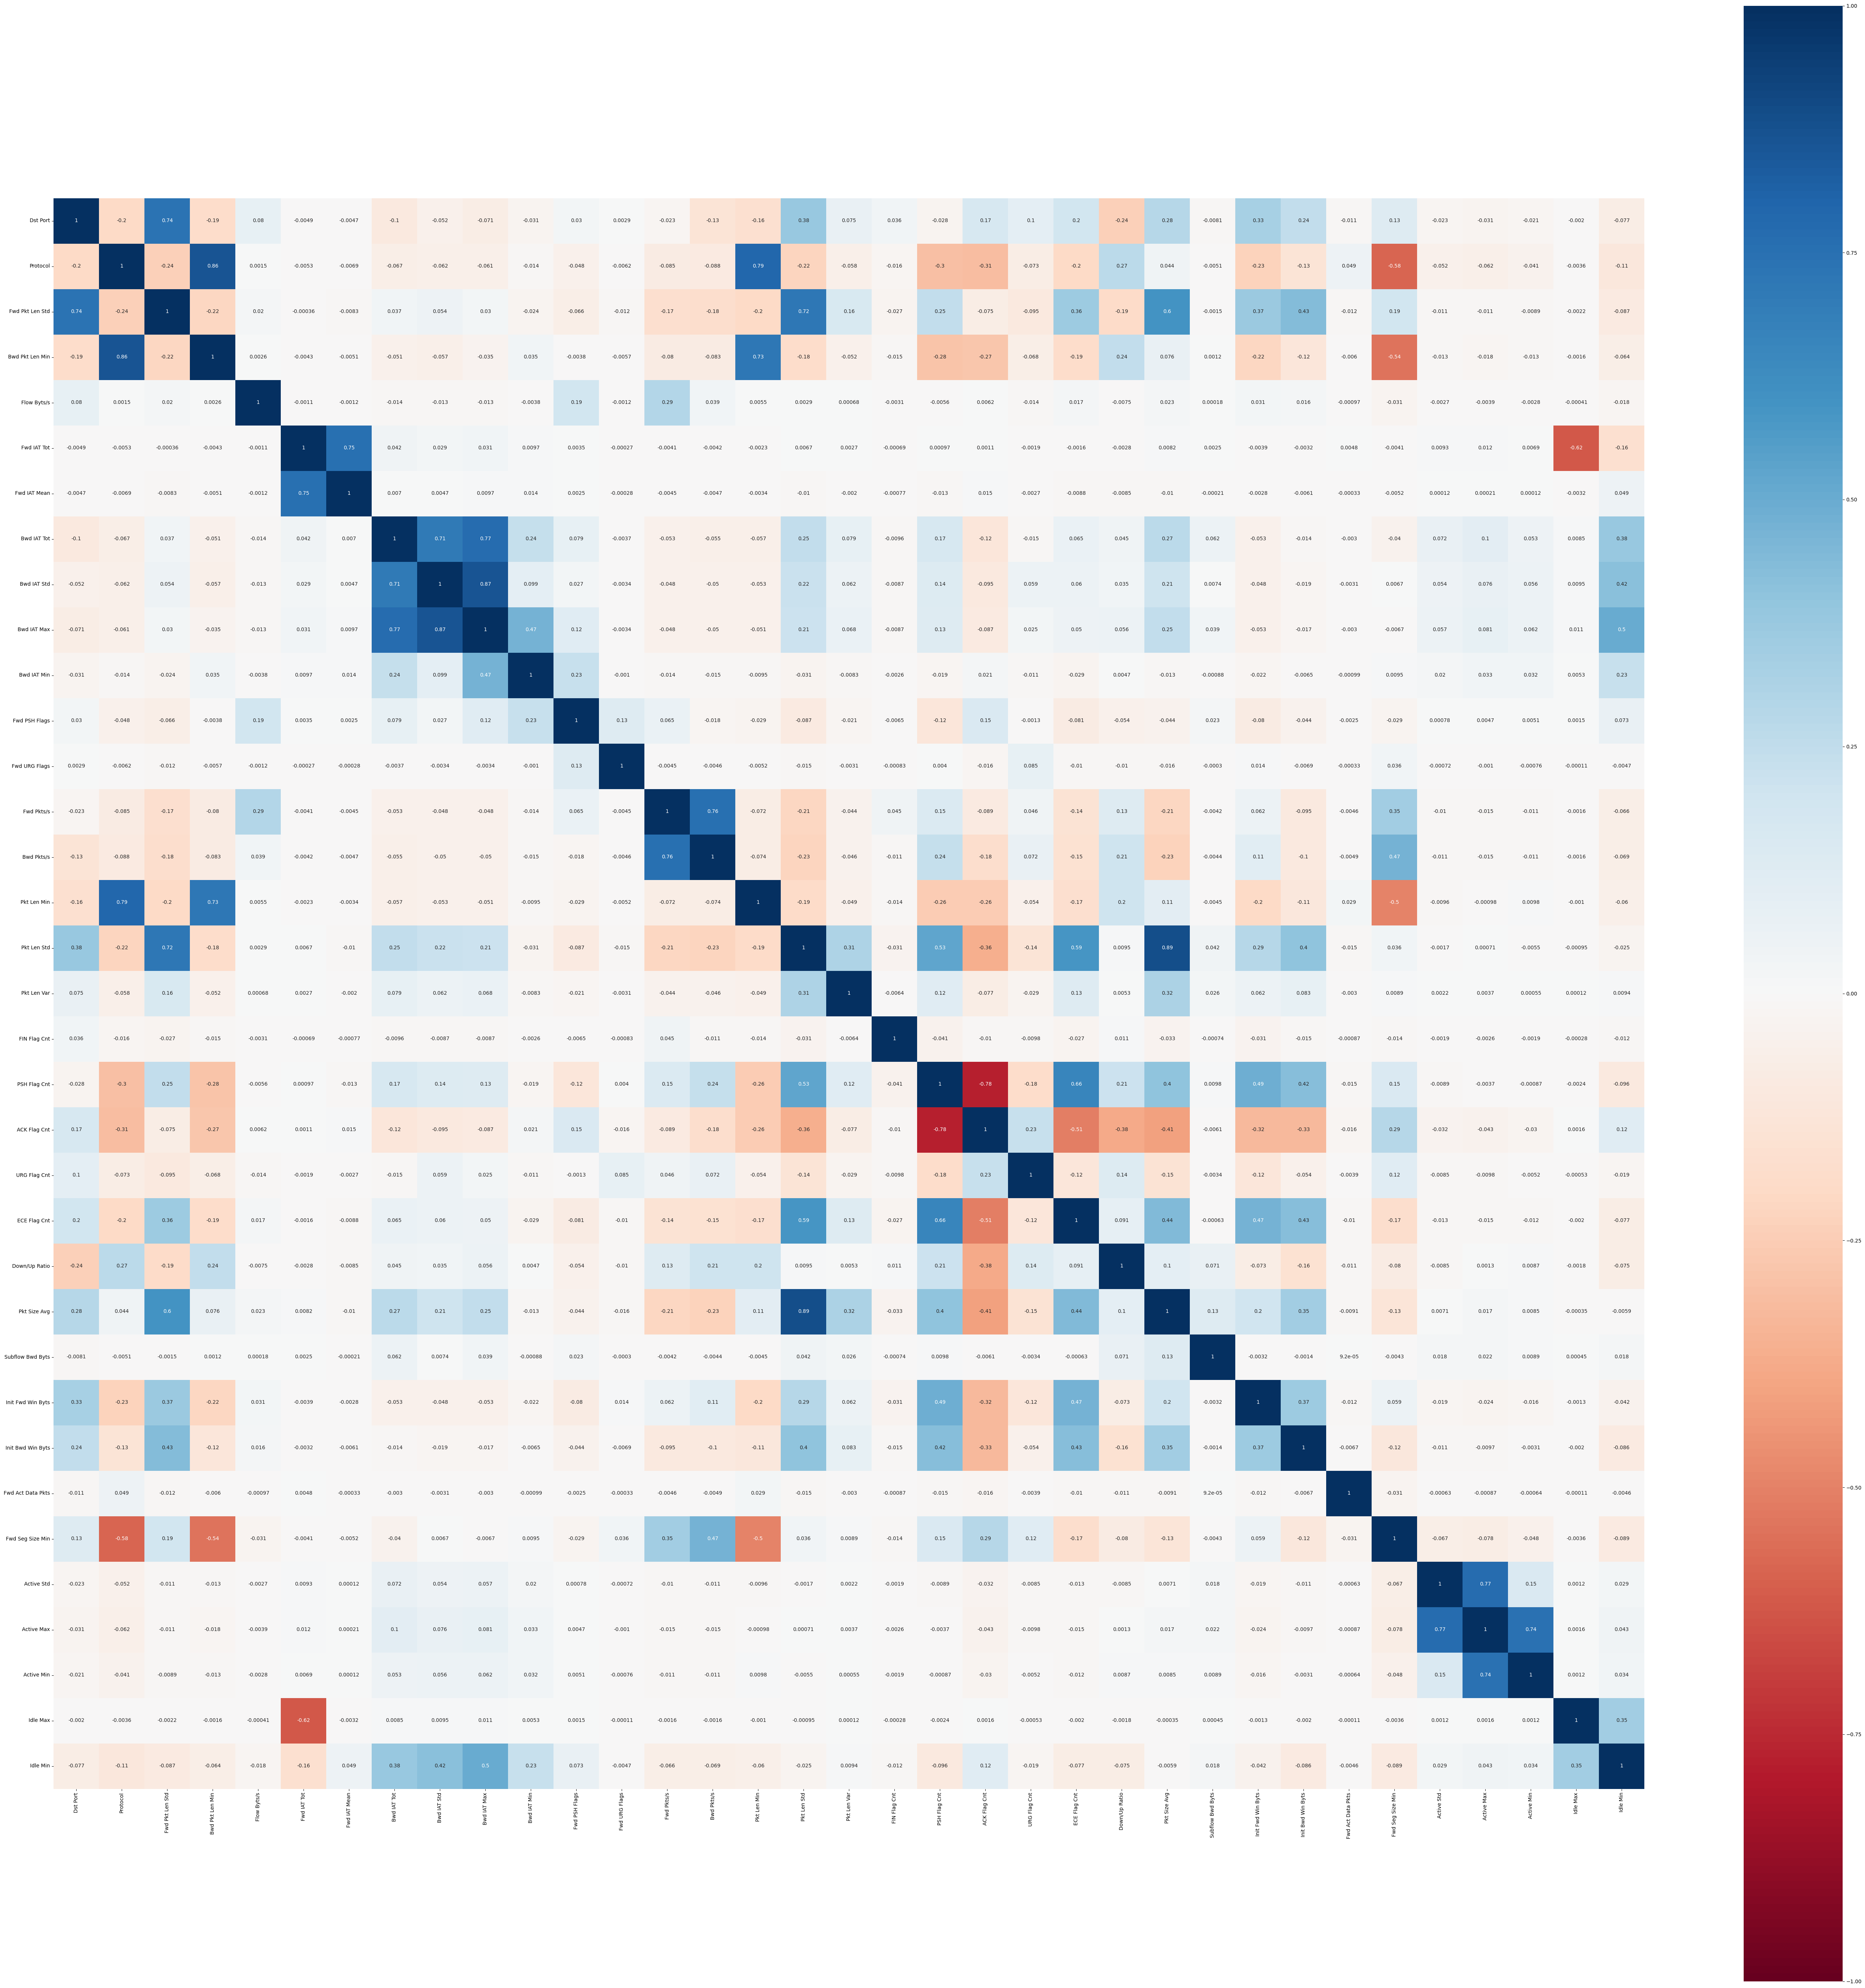

CPU times: user 17.6 s, sys: 470 ms, total: 18.1 s
Wall time: 17.8 s


In [30]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_all.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [31]:
label_col = "Label"

In [32]:
feature_cols = list(df_all.columns)
feature_cols

['Dst Port',
 'Protocol',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Min',
 'Flow Byts/s',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Bwd IAT Tot',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Fwd URG Flags',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Max',
 'Idle Min',
 'Threat',
 'Label']

In [33]:
label_col = 'Label'

feature_cols.remove("Threat")
feature_cols.remove(label_col)

In [34]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=2, shuffle=True, stratify=df_all[label_col])

del df_all 

In [35]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

minmax_scaler = MinMaxScaler()
train_df[feature_cols] = minmax_scaler.fit_transform(train_df[feature_cols])
test_df[feature_cols] = minmax_scaler.transform(test_df[feature_cols])


In [36]:
order_label_list = list(np.unique(train_df[label_col]))
order_label_list

['Benign',
 'Botnet',
 'Brute-force',
 'DDoS attack',
 'DoS attack',
 'Infilteration',
 'Web attack']

In [37]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=order_label_list,
                                                 y=train_df[label_col].values)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 0.2857142857142857,
 1: 2.261220175569409,
 2: 1.6987903123737271,
 3: 0.6906350330729916,
 4: 1.2961752730414977,
 5: 4.028551196840293,
 6: 696.7875408575273}

In [38]:
import json 
    
with open("class_weights.json", "w") as outfile: 
    json.dump(class_weights, outfile)

In [39]:
import json 

label_dict = {v:v for v in order_label_list}
    
with open("label_dict.json", "w") as outfile: 
    json.dump(label_dict, outfile)


    label_dict

In [40]:
y_train = [order_label_list.index(k) for k in train_df[label_col]]
y_test = [order_label_list.index(k) for k in test_df[label_col]]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
              precision    recall  f1-score   support

           0       0.93      0.98      0.96    452999
           1       1.00      0.93      0.96     57238
           2       0.78      1.00      0.88     76189
           3       0.96      1.00      0.98    187405
           4       1.00      0.79      0.88     99854
           5       0.74      0.19      0.30     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.93    905998
   macro avg       0.78      0.70      0.71    905998
weighted avg       0.93      0.93      0.92    905998



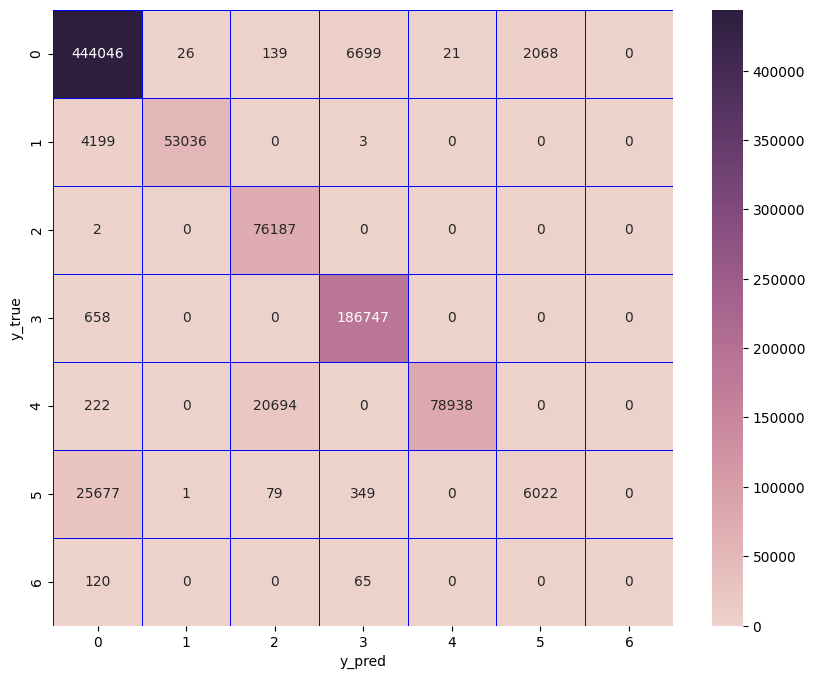

In [41]:
#Decision Tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
%time
dt.fit(train_df[feature_cols].values, y_train)    

y_pred = dt.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 18.8 µs
              precision    recall  f1-score   support

           0       0.92      0.96      0.94    452999
           1       1.00      0.94      0.97     57238
           2       0.79      1.00      0.88     76189
           3       0.92      1.00      0.96    187405
           4       0.99      0.79      0.88     99854
           5       0.00      0.00      0.00     32128
           6       0.00      0.00      0.00       185

    accuracy                           0.92    905998
   macro avg       0.66      0.67      0.66    905998
weighted avg       0.89      0.92      0.90    905998



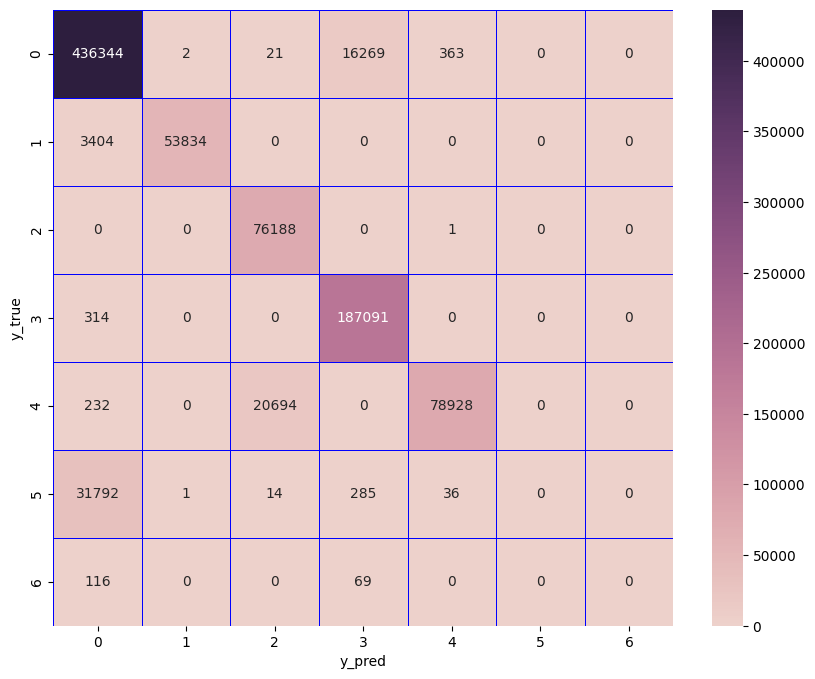

In [42]:
#Random Forest 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(max_depth=5)
%time
rf.fit(train_df[feature_cols].values, y_train)    
y_pred = rf.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [54]:
import pickle
import joblib

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    452999
           1       1.00      1.00      1.00     57238
           2       0.87      0.96      0.91     76189
           3       1.00      1.00      1.00    187405
           4       0.96      0.89      0.92     99854
           5       0.73      0.28      0.40     32128
           6       0.97      0.82      0.89       185

    accuracy                           0.95    905998
   macro avg       0.93      0.85      0.87    905998
weighted avg       0.95      0.95      0.95    905998



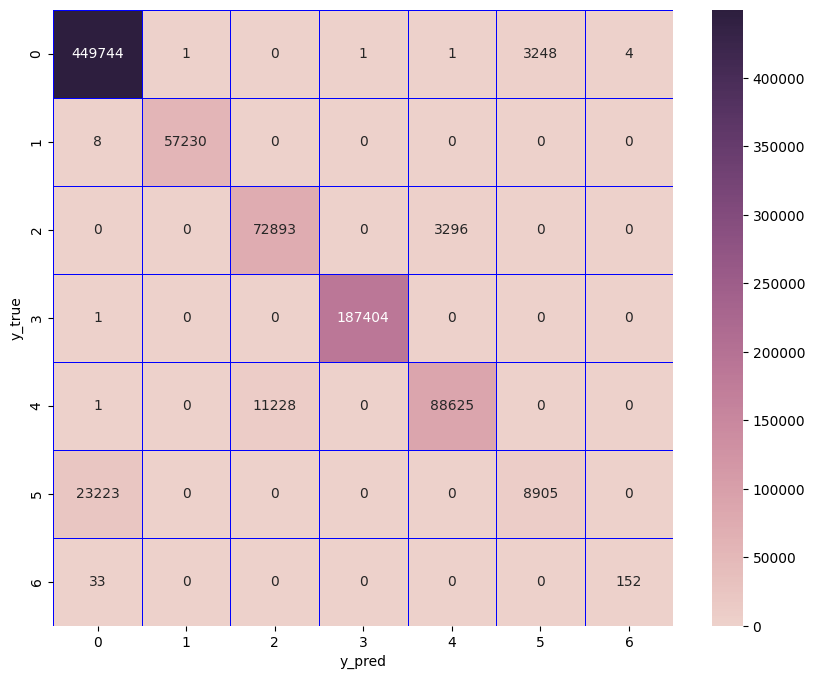

In [43]:
#xGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model = XGBClassifier(n_estimators=100)
%time
model.fit(train_df[feature_cols].values, y_train)    
y_pred = model.predict(test_df[feature_cols].values)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [55]:
import pickle
import joblib

with open('xgboost__model.pkl', 'wb') as file:
    pickle.dump(model, file)